In [170]:
import numpy as np
import matplotlib.pyplot as plt

In [171]:
def dVdx(x):
    return x - x**3


# Parameters
dv = 0.1
dt = 0.0001

In [172]:
def vcrit(gamma, dt, dv):
        
    # Initial state
    x0 = 0
    v0 = 0

    # Evolution
    t = 0
    x = x0
    v = v0
    while x < 1:   # Cross the barrier
        x_old = x
        x = x + v*dt
        v = v-dt*(gamma*t*v+dVdx(x_old))        # gamma = -a/b
        t = t + dt
        if v <= 0:
            #print(t)
            v0 = v0 + dv
            x = x0
            v = v0
            t = 0

    #print("t = " + str(t))
    #print("v critical = " + str(v0))
    return v0

In [173]:
N = 1000
dgamma = 5
gamma0 = 10
gammas = np.arange(0,N)*dgamma + gamma0
vcrits = np.zeros(N)
for i in np.arange(0,N):
    vcrits[i] = vcrit(gammas[i], dt, dv)

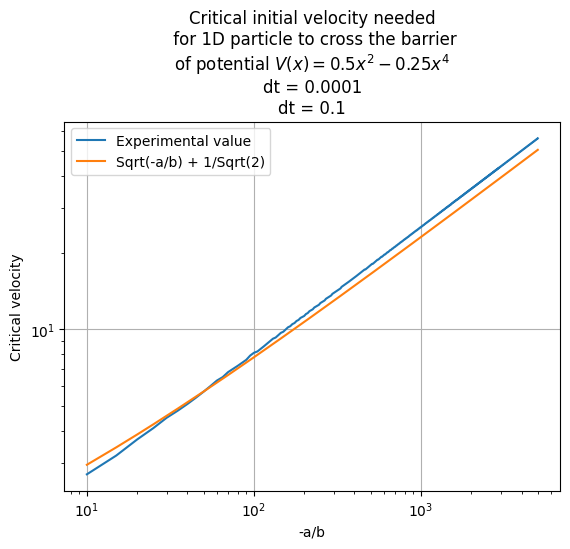

In [174]:
fig, ax = plt.subplots()
ax.plot(gammas,vcrits,label="Experimental value")
ax.set_xscale("log")
ax.set_yscale("log")
title = "Critical initial velocity needed\n for 1D particle to cross the barrier\nof potential $V(x)=0.5 x^2 - 0.25 x^4$"
title = title + "\ndt = " + str(dt)
title = title + "\ndt = " + str(dv)

ax.set_title(title)
ax.set_xlabel("-a/b")
ax.set_ylabel("Critical velocity")
ax.grid()

ax.plot(gammas, 1/np.sqrt(2)*np.power(gammas,0.5)+np.ones(N)/np.sqrt(2), label="Sqrt(-a/b) + 1/Sqrt(2)")
ax.legend()